In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# NY Facilities - Public and Non-Public

Initially, I was inspired by the idea of “every man for himself” and wanted to critique the concept of American individualism. The very existence of so many facilities suggests that even highly developed cities require these "community" efforts to support and help flourish an individual’s living style on a institutional level. 

But as a whole, do either public and non-public facilities affect civilian life more than another?

The data (last updated May 2017) contains information for over 35,000 public and non-public facilities and program sites in New York, New York. Its data is focused on facilities that aim to improve the quality of local lifestyles for civilians through services such as food, rehabilitation, and more. Facilities include things like schools, parks, transportation locations etc. The Department of City Planning aggregates this information for city planning purposes.

**For analysis, I aim to compare and contrast the use of public vs non-public facilities. I anticipate that the two operation types will be very different when comparing aspects such as domain and location. I expect doing this will allow us to infer on a very broad level what the public and non-public facilities find as their main 'needs' in the community.** 

Questions: 
1. What are the most populous facility domain types in NY?
2. Do public and private sectors have similar focuses? What is the proportion of their facility numbers compared to the overall total? Is there a relationship between facility type and operation type (public vs. private)?
3. How might location affect the appearance of public and private facilities? Do locations with more public, more non-public, or a combination of both have a higher American Human Development Index (AHDI)?

# 1. Evaluating the Data

### What are the most populous facility domain types in NY?

In [125]:
#The facilities data comes from the NYC facilities database. The data from the version last updated May 2017
facilities = pd.read_csv('facilities.csv')
facilities

,the_geom,idold,cartodb_id,uid,idagency,facname,addressnum,streetname,address,city,...,opabbrev,overlevel,overagency,overabbrev,datasource,dataname,dataurl,datadate,pgtable,uid_merged
0,POINT (-73.831214 40.76035),NaN,4779,25022,NaN,La Jornada,135-32,38 Avenue,135-32 38 Avenue,Flushing,...,Non-public,Non-public Oversight,Non-public,Non-public,FBNYC,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16,NaN,FBNYC: 2016-08-27,foodbankny_facilities_foodbanks,NaN
1,POINT (-73.993025 40.746522),NaN,7666,35303,NYSED: 310200100028,Vacamas Programs For Youth,153,West 27 Street,153 West 27 Street,New York,...,Non-public,NYSED: State,NYS Education Department,NYSED,NYSED,NYSED: Listings - Active Institutions with GIS...,NYSED: https://portal.nysed.gov/discoverer/app...,NYSED: 2016-08-27,nysed_facilities_activeinstitutions,NaN
2,POINT (-73.906242 40.661885),NaN,19304,42211,NaN,Riverdale Osborne,440,Watkins Street,440 Watkins Street,Brooklyn,...,Non-public,Non-public Oversight,Non-public,Non-public,FBNYC,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16,NaN,FBNYC: 2016-08-27,foodbankny_facilities_foodbanks,NaN
3,POINT (-73.954443 40.813433),NaN,35668,36228,NaN,African Services Committee,429,West 127 Street,429 West 127 Street,New York,...,Non-public,Non-public Oversight,Non-public,Non-public,FBNYC,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16,NaN,FBNYC: 2016-08-27,foodbankny_facilities_foodbanks,NaN
4,POINT (-73.935917 40.800593),NaN,35721,62636,NYCDHS: 88,Haven,239,East 121 Street,239 East 121 Street,New York,...,Non-public,NYCDHS: City,NYC Department of Homeless Services,NYCDHS,NYCDHS,NYCDHS: DHS Shelter Listing,NaN,NYCDHS: 2016-08-27,dhs_facilities_shelters,NaN
5,POINT (-74.155124 40.558438),NaN,326,30293,NYSED: 800000057586,Vacation Day Camp At PS 32,32,Elverton Avenue,32 Elverton Avenue,Staten Island,...,Non-public,NYSED: State,NYS Education Department,NYSED,NYSED,NYSED: Listings - Active Institutions with GIS...,NYSED: https://portal.nysed.gov/discoverer/app...,NYSED: 2016-08-27,nysed_facilities_activeinstitutions,NaN
6,POINT (-73.762932 40.690194),NaN,371,27746,NaN,First Church of God in Christ,187-10,Baisley Boulevard,187-10 Baisley Boulevard,Saint Albans,...,Non-public,Non-public Oversight,Non-public,Non-public,FBNYC,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16,NaN,FBNYC: 2016-08-27,foodbankny_facilities_foodbanks,NaN
7,POINT (-74.085447 40.641893),NaN,380,10268,NaN,PS 31. Plygd/Davis Plygd,55,Layton Avenue,55 Layton Avenue,Staten Island,...,NYCDOE,NYCDOE: City,NYC Department of Education,NYCDOE,NYCDCAS,NYCDCAS: City Owned and Leased Properties,NYCDCAS: http://www1.nyc.gov/site/planning/dat...,NYCDCAS: 2016-10-20,dcas_facilities_colp,NaN
8,POINT (-73.97013 40.710027),NaN,404,985,NaN,City Owned Property,58,Kent Avenue,58 Kent Avenue,New York,...,NYCSBS,NYCSBS: City,NYC Department of Small Business Services,NYCSBS,NYCDCAS,NYCDCAS: City Owned and Leased Properties,NYCDCAS: http://www1.nyc.gov/site/planning/dat...,NYCDCAS: 2016-10-20,dcas_facilities_colp,NaN
9,POINT (-73.906308 40.745508),NaN,420,69598,NYCDPR: Q057,Sohncke Square,NaN,NaN,NaN,Woodside,...,NYCDPR,NYCDPR: City,NYC Department of Parks and Recreation,NYCDPR,NYCDPR,NYCDPR: Parks Properties,NYCDPR: https://data.cityofnewyork.us/City-Gov...,NYCDPR: 2016-08-27,dpr_parksproperties,NaN


### Cleaning the Data

There are a lot of unneeded columns so I'm going to drop the unneccesary ones.

In [126]:
#Easily get all title names so I can see which ones to drop because so that I can easily see all the columns displayed
facilities.columns.values

array(['the_geom', 'idold', 'cartodb_id', 'uid', 'idagency', 'facname',
       'addressnum', 'streetname', 'address', 'city', 'boro', 'borocode',
       'zipcode', 'latitude', 'longitude', 'xcoord', 'ycoord', 'bin',
       'bbl', 'commboard', 'council', 'censtract', 'nta', 'facdomain',
       'facgroup', 'facsubgrp', 'factype', 'capacity', 'util', 'captype',
       'utilrate', 'area', 'areatype', 'proptype', 'optype', 'opname',
       'opabbrev', 'overlevel', 'overagency', 'overabbrev', 'datasource',
       'dataname', 'dataurl', 'datadate', 'pgtable', 'uid_merged'], dtype=object)

In [271]:
#clean data by dropping unneeded columns
fac_clean = facilities.drop(['the_geom', 'borocode', 'idold', 'cartodb_id', 'uid', 'idagency',
                             'addressnum', 'streetname', 'address', 'zipcode', 'bin',
                             'bbl', 'commboard', 'council', 'nta', 'captype', 'utilrate',
                             'area', 'areatype', 'proptype', 'opabbrev', 
                             'datasource', 'datadate', 'dataurl', 'pgtable', 'uid_merged'
                             ], axis=1)
fac_clean

,facname,city,boro,latitude,longitude,xcoord,ycoord,censtract,facdomain,facgroup,facsubgrp,factype,capacity,util,optype,opname,overlevel,overagency,overabbrev,dataname
0,La Jornada,Flushing,Queens,40.760350,-73.831214,1.031009e+06,216337.7506,87100,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Food Pantry,NaN,NaN,Non-public,La Jornada,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
1,Vacamas Programs For Youth,New York,Manhattan,40.746522,-73.993025,9.861827e+05,211254.7309,9500,"Education, Child Welfare, and Youth",Child Services and Welfare,Child Nutrition,Feeding Site,NaN,NaN,Non-public,"Vacamas Programs For Youth Of NY, Inc.",NYSED: State,NYS Education Department,NYSED,NYSED: Listings - Active Institutions with GIS...
2,Riverdale Osborne,Brooklyn,Brooklyn,40.661885,-73.906242,1.010262e+06,180432.7911,91800,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Food Pantry,NaN,NaN,Non-public,Riverdale Osborne,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
3,African Services Committee,New York,Manhattan,40.813433,-73.954443,9.968606e+05,235635.9699,21303,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Food Pantry,NaN,NaN,Non-public,African Services Committee,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
4,Haven,New York,Manhattan,40.800593,-73.935917,1.001992e+06,230960.9686,19400,Health and Human Services,Human Services,Permanent Supportive SRO Housing,Supportive Housing,NYCDHS: 20,NaN,Non-public,"Odyssey House, Hdfc",NYCDHS: City,NYC Department of Homeless Services,NYCDHS,NYCDHS: DHS Shelter Listing
5,Vacation Day Camp At PS 32,Staten Island,Staten Island,40.558438,-74.155124,9.411457e+05,142768.7058,14608,"Education, Child Welfare, and Youth",Child Services and Welfare,Child Nutrition,Summer Only Feeding Site,NaN,NaN,Non-public,Vacation Day Camp At PS 32,NYSED: State,NYS Education Department,NYSED,NYSED: Listings - Active Institutions with GIS...
6,First Church of God in Christ,Saint Albans,Queens,40.690194,-73.762932,1.049994e+06,190821.5925,36600,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Soup Kitchen,NaN,NaN,Non-public,First Church of God in Christ,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
7,PS 31. Plygd/Davis Plygd,Staten Island,Staten Island,40.641893,-74.085447,9.605366e+05,173146.9176,900,"Parks, Gardens, and Historical Sites",Parks and Plazas,Recreation and Waterfront Sites,Playground/Sports Area,NaN,NaN,Public,NYC Department of Education,NYCDOE: City,NYC Department of Education,NYCDOE,NYCDCAS: City Owned and Leased Properties
8,City Owned Property,New York,Manhattan,40.710027,-73.970130,9.925310e+05,197960.0001,1001,Administration of Government,Other Property,Miscellaneous Use,No Use,NaN,NaN,Public,NYC Department of Small Business Services,NYCSBS: City,NYC Department of Small Business Services,NYCSBS,NYCDCAS: City Owned and Leased Properties
9,Sohncke Square,Woodside,Queens,40.745508,-73.906308,1.010211e+06,210899.0338,24900,"Parks, Gardens, and Historical Sites",Parks and Plazas,"Streetscapes, Plazas, and Malls",Triangle/Plaza,NaN,NaN,Public,NYC Department of Parks and Recreation,NYCDPR: City,NYC Department of Parks and Recreation,NYCDPR,NYCDPR: Parks Properties


### Facility Summary Visualizations at a Glance through Grouping

Just to get an idea of the data I am dealing with, I am going to make some quick variables of location and domain data that I can reference later on if needed by grouping columns together.

In [128]:
#Location Information - Cities
cities = fac_clean.city.value_counts()
cities

Brooklyn               10312
New York                9398
Bronx                   6035
Staten Island           2725
Jamaica                 1175
Flushing                 715
Astoria                  426
Far Rockaway             399
Long Island City         378
Corona                   256
Woodside                 234
Ridgewood                233
Elmhurst                 227
Forest Hills             200
East Elmhurst            185
Queens Village           184
Maspeth                  184
Springfield Gardens      182
Ozone Park               175
Fresh Meadows            161
Bayside                  144
Whitestone               142
Saint Albans             138
South Ozone Park         134
Richmond Hill            127
Jackson Heights          124
Little Neck              120
Hollis                   105
Bellerose                102
Rockaway Park            100
Kew Gardens              100
Oakland Gardens           95
College Point             95
Howard Beach              94
Middle Village

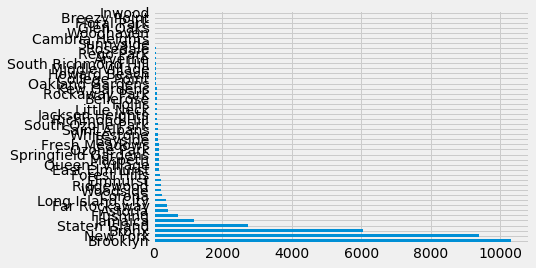

In [129]:
cities.plot.barh()

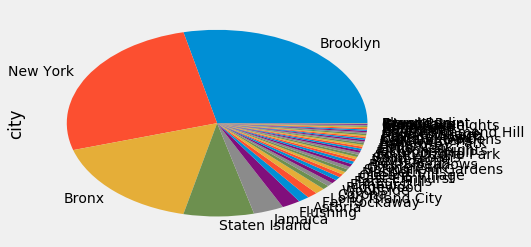

In [130]:
cities.plot.pie()

Wow, that's a lot of cities! Additionally, since the majority the facilities are not well-distributed among all the locations (New York and Brooklyn make up more than half!), this might not be the best way to compare facilities.

In [131]:
#Location Information - Boroughs
boro = fac_clean.boro.value_counts()

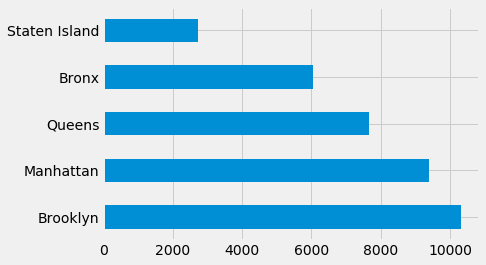

In [132]:
boro.plot.barh()

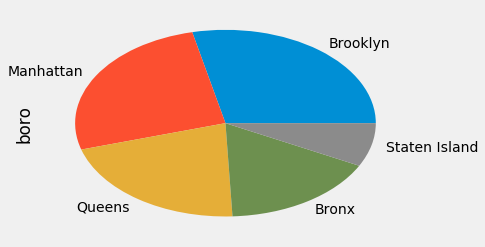

In [133]:
boro.plot.pie()

Compared to the cities, the boroughs are a lot easier to categorize the different facilities.

In [134]:
#Facilities Information - The 7 Main Domains
fac_domain = fac_clean.facdomain.value_counts()
fac_domain

Education, Child Welfare, and Youth                                 14976
Parks, Gardens, and Historical Sites                                 5340
Core Infrastructure and Transportation                               4809
Health and Human Services                                            4763
Administration of Government                                         3571
Libraries and Cultural Programs                                      2023
Public Safety, Emergency Services, and Administration of Justice      630
Name: facdomain, dtype: int64

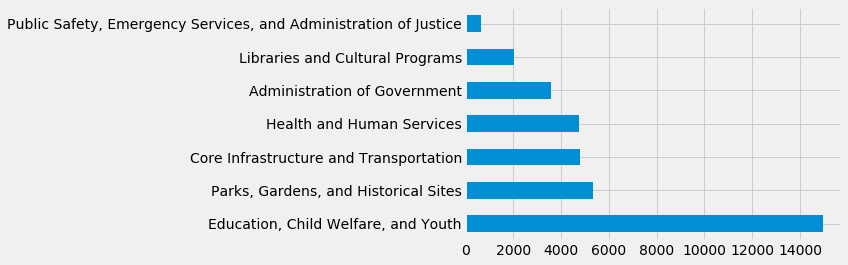

In [135]:
fac_domain.plot.barh()

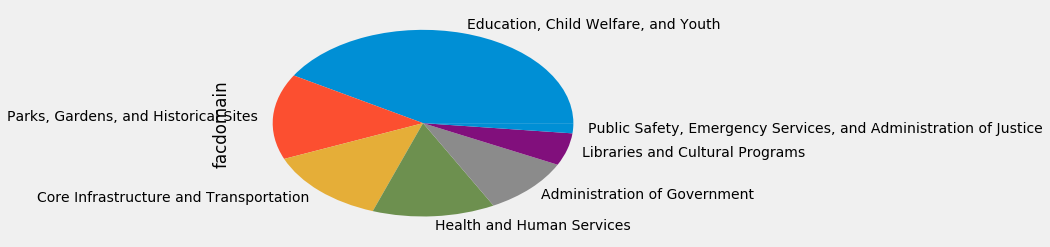

In [136]:
fac_domain.plot.pie()

In total, it appears like there's an interesting spread of facilities in New York. *Education, Child Welfare, and Youth* dominate about 40% of the facilities in New York while *Public Safety, Emergency Services, and Administration of Justice* represents only about 1.7% of all facilities.

Getting even more specific as to what types of purposes these facilities servce, let's look at the facility groups and subgroups

In [137]:
#Facilities Information - The 7 Main Domains
fac_group = fac_clean.facgroup.value_counts()
fac_group

Parks and Plazas                                 4531
Child Care and Pre-Kindergarten                  4442
Schools (K-12)                                   3385
Child Services and Welfare                       3273
Transportation                                   2858
Youth Services                                   2610
Health Care                                      2575
Other Property                                   2213
Human Services                                   2188
Solid Waste                                      1787
Cultural Institutions                            1753
Offices, Training, and Testing                    917
Historical Sites                                  809
Vocational and Proprietary Schools                575
Camps                                             527
City Agency Parking, Maintenance, and Storage     441
Libraries                                         270
Emergency Services                                248
Justice and Corrections     

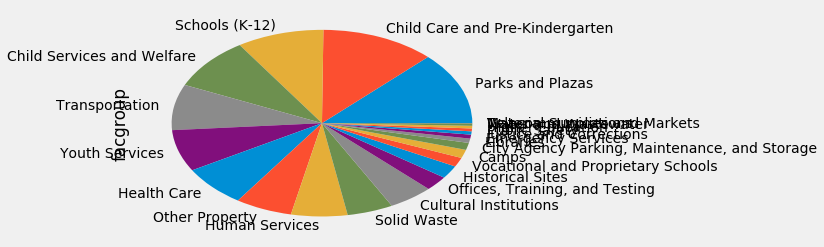

In [138]:
fac_group.plot.pie()

In [204]:
#Facilities Information - Facility Subgroups
fac_subgrp = fac_clean.facsubgrp.value_counts()
fac_subgrp

Child Nutrition                                                           3189
Parking Lots and Garages                                                  2215
Child Care                                                                2193
Miscellaneous Use                                                         1939
DOE Universal Pre-Kindergarten                                            1883
Public K-12 Schools                                                       1823
Youth Centers, Literacy Programs, Job Training, and Immigrant Services    1802
Recreation and Waterfront Sites                                           1632
Other Cultural Institutions                                               1586
Solid Waste Transfer and Carting                                          1527
Parks                                                                     1204
Hospitals and Clinics                                                     1087
Offices                                             

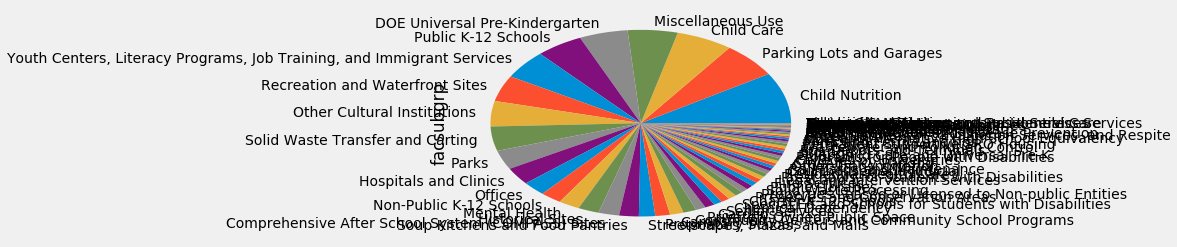

In [205]:
fac_subgrp.plot.pie()

Overall, we have determined that the most populous domain type in New York is *Education, Child Welfare, and Youth*. Looking more closely at these domain groups and subgroups, parks and plazas make up the largest group of facilities, but child nutrition counts as the highest number of appearing subgroups. This makes sense because if we look at the major groups on the pie charts, *Education, Child Welfore, and Youth* is broken down into a lot more subgroups. Since there are likely less subgroups for the parks, it managed to overcount subgroups like child nutrition when grouped together between facility domain and facility subgroups - however, we can also see from the data that groups like Child Care and Pre-Kindergarten and Child Services of Welfare are not that far behing in count compared to Parks and Plazas.

# 2. Public and Non-Public Facilities

### Do public and non-public facilities have similar focuses? What is the proportion of their facility numbers compared to the overall total? Is there a relationship between facility type and operation type (public vs. non-public)?

In [141]:
#We are now going to isolate the operation type of public vs. non-public operations
optype = fac_clean.optype.value_counts()
optype

Non-public    23483
Public        12629
Name: optype, dtype: int64

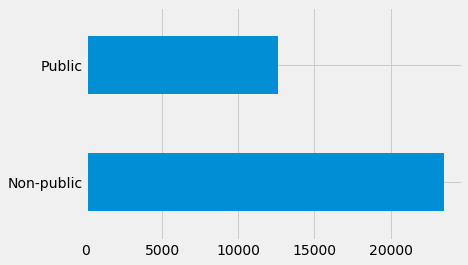

In [142]:
optype.plot.barh()

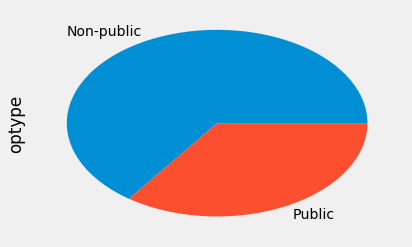

In [143]:
optype.plot.pie()

There are almost 2x as many non-public facilities as public facilities!

To investigate further, I will now isolate the public and private facilities domains so that they can be compared

In [144]:
#Here we have public facilities table in New York
public = fac_clean.loc[fac_clean['optype'] == ("Public")]
public

,facname,city,boro,latitude,longitude,xcoord,ycoord,censtract,facdomain,facgroup,facsubgrp,factype,capacity,util,optype,opname,overlevel,overagency,overabbrev,dataname
7,PS 31. Plygd/Davis Plygd,Staten Island,Staten Island,40.641893,-74.085447,9.605366e+05,173146.9176,900,"Parks, Gardens, and Historical Sites",Parks and Plazas,Recreation and Waterfront Sites,Playground/Sports Area,NaN,NaN,Public,NYC Department of Education,NYCDOE: City,NYC Department of Education,NYCDOE,NYCDCAS: City Owned and Leased Properties
8,City Owned Property,New York,Manhattan,40.710027,-73.970130,9.925310e+05,197960.0001,1001,Administration of Government,Other Property,Miscellaneous Use,No Use,NaN,NaN,Public,NYC Department of Small Business Services,NYCSBS: City,NYC Department of Small Business Services,NYCSBS,NYCDCAS: City Owned and Leased Properties
9,Sohncke Square,Woodside,Queens,40.745508,-73.906308,1.010211e+06,210899.0338,24900,"Parks, Gardens, and Historical Sites",Parks and Plazas,"Streetscapes, Plazas, and Malls",Triangle/Plaza,NaN,NaN,Public,NYC Department of Parks and Recreation,NYCDPR: City,NYC Department of Parks and Recreation,NYCDPR,NYCDPR: Parks Properties
10,Machate Circle,Brooklyn,Brooklyn,40.651028,-73.972190,9.919668e+05,176464.6541,17700,"Parks, Gardens, and Historical Sites",Parks and Plazas,"Streetscapes, Plazas, and Malls",Triangle/Plaza,NaN,NaN,Public,NYC Department of Parks and Recreation,NYCDPR: City,NYC Department of Parks and Recreation,NYCDPR,NYCDPR: Parks Properties
18,Park,Jamaica,Queens,40.668576,-73.795426,1.041001e+06,182923.0000,79200,"Parks, Gardens, and Historical Sites",Parks and Plazas,Recreation and Waterfront Sites,Playground/Sports Area,NaN,NaN,Public,NYC Department of Parks and Recreation,NYCDPR: City,NYC Department of Parks and Recreation,NYCDPR,NYCDCAS: City Owned and Leased Properties
20,Boston Road Garden,Bronx,Bronx,40.865720,-73.861789,1.022478e+06,254713.0001,34000,"Parks, Gardens, and Historical Sites",Parks and Plazas,Parks,Park,NaN,NaN,Public,NYC Department of Parks and Recreation,NYCDPR: City,NYC Department of Parks and Recreation,NYCDPR,NYCDCAS: City Owned and Leased Properties
22,City Owned Property,Staten Island,Staten Island,40.559112,-74.093980,9.581360e+05,142990.0002,12804,Administration of Government,Other Property,Miscellaneous Use,No Use-Vacant Land,NaN,NaN,Public,NYC Department of Citywide Administrative Serv...,NYCDCAS: City,NYC Department of Citywide Administrative Serv...,NYCDCAS,NYCDCAS: City Owned and Leased Properties
26,Segundo Ruiz Belvis D&Tc,Bronx,Bronx,40.810137,-73.915788,1.007562e+06,234442.8560,4100,Health and Human Services,Health Care,Hospitals and Clinics,Ambulatory Health Facility,NaN,NaN,Public,NYC Health and Hospitals Corporation,NYCHHC: City,NYC Health and Hospitals Corporation,NYCHHC,NYCDCAS: City Owned and Leased Properties
28,Lowry Triangle,Brooklyn,Brooklyn,40.680561,-73.964516,9.940920e+05,187224.9999,20300,"Parks, Gardens, and Historical Sites",Parks and Plazas,Parks,Park,NaN,NaN,Public,NYC Department of Parks and Recreation,NYCDPR: City,NYC Department of Parks and Recreation,NYCDPR,NYCDCAS: City Owned and Leased Properties
29,1st Pct Pol Stat,New York,Manhattan,40.720244,-74.007099,9.822820e+05,201681.0295,3300,"Public Safety, Emergency Services, and Adminis...",Public Safety,Other Public Safety,Public Safety Facility,NaN,NaN,Public,NYC Police Department,NYPD: City,NYC Police Department,NYPD,NYCDCAS: City Owned and Leased Properties


In [145]:
#Here we have a table of non-pubilc facilities in New York
private = fac_clean.loc[fac_clean['optype'] == ("Non-public")]
private

,facname,city,boro,latitude,longitude,xcoord,ycoord,censtract,facdomain,facgroup,facsubgrp,factype,capacity,util,optype,opname,overlevel,overagency,overabbrev,dataname
0,La Jornada,Flushing,Queens,40.760350,-73.831214,1.031009e+06,216337.7506,87100,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Food Pantry,NaN,NaN,Non-public,La Jornada,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
1,Vacamas Programs For Youth,New York,Manhattan,40.746522,-73.993025,9.861827e+05,211254.7309,9500,"Education, Child Welfare, and Youth",Child Services and Welfare,Child Nutrition,Feeding Site,NaN,NaN,Non-public,"Vacamas Programs For Youth Of NY, Inc.",NYSED: State,NYS Education Department,NYSED,NYSED: Listings - Active Institutions with GIS...
2,Riverdale Osborne,Brooklyn,Brooklyn,40.661885,-73.906242,1.010262e+06,180432.7911,91800,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Food Pantry,NaN,NaN,Non-public,Riverdale Osborne,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
3,African Services Committee,New York,Manhattan,40.813433,-73.954443,9.968606e+05,235635.9699,21303,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Food Pantry,NaN,NaN,Non-public,African Services Committee,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
4,Haven,New York,Manhattan,40.800593,-73.935917,1.001992e+06,230960.9686,19400,Health and Human Services,Human Services,Permanent Supportive SRO Housing,Supportive Housing,NYCDHS: 20,NaN,Non-public,"Odyssey House, Hdfc",NYCDHS: City,NYC Department of Homeless Services,NYCDHS,NYCDHS: DHS Shelter Listing
5,Vacation Day Camp At PS 32,Staten Island,Staten Island,40.558438,-74.155124,9.411457e+05,142768.7058,14608,"Education, Child Welfare, and Youth",Child Services and Welfare,Child Nutrition,Summer Only Feeding Site,NaN,NaN,Non-public,Vacation Day Camp At PS 32,NYSED: State,NYS Education Department,NYSED,NYSED: Listings - Active Institutions with GIS...
6,First Church of God in Christ,Saint Albans,Queens,40.690194,-73.762932,1.049994e+06,190821.5925,36600,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Soup Kitchen,NaN,NaN,Non-public,First Church of God in Christ,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
11,Community Church of the Nazarene,Far Rockaway,Queens,40.606369,-73.750930,1.053409e+06,160291.1277,103202,Health and Human Services,Human Services,Soup Kitchens and Food Pantries,Food Pantry,NaN,NaN,Non-public,Community Church of the Nazarene,Non-public Oversight,Non-public,Non-public,FBNYC: FBNYC Food Pantry Soup Kitchen List 8-5-16
12,Kingsboro ATC IP,Brooklyn,Brooklyn,40.689982,-73.928806,1.003994e+06,190663.4684,38700,Health and Human Services,Health Care,Chemical Dependency,Inpatient Chemical Dependency,NaN,NaN,Non-public,Kingsboro Addiction Treatment Center,NYSOASAS: State,NYS Office of Alcoholism and Substance Abuse S...,NYSOASAS,NYSOASAS: NYS OASAS-Certified Chemical Depende...
13,Bronx HS Of Letters,Bronx,Bronx,40.813720,-73.925919,1.004756e+06,235745.7719,5100,"Education, Child Welfare, and Youth",Child Services and Welfare,Child Nutrition,Feeding Site,NaN,NaN,Non-public,Bronx HS Of Letters,NYSED: State,NYS Education Department,NYSED,NYCDCAS: City Owned and Leased Properties;NYSE...


We now create graphs to compare public vs. private institutions in New York. 

In [146]:
public_domain = public.facdomain.value_counts()
public_domain

Parks, Gardens, and Historical Sites                                4162
Administration of Government                                        3550
Education, Child Welfare, and Youth                                 2944
Core Infrastructure and Transportation                               807
Public Safety, Emergency Services, and Administration of Justice     630
Health and Human Services                                            495
Libraries and Cultural Programs                                       41
Name: facdomain, dtype: int64

We now make bar graphs for the public facility domains...

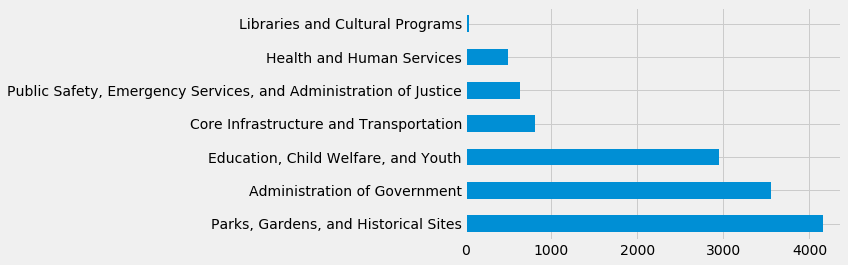

In [147]:
public_domain.plot.barh()

...the non-public facility domains...

In [148]:
private_domain = private.facdomain.value_counts()
private_domain

Education, Child Welfare, and Youth       12032
Health and Human Services                  4268
Core Infrastructure and Transportation     4002
Libraries and Cultural Programs            1982
Parks, Gardens, and Historical Sites       1178
Administration of Government                 21
Name: facdomain, dtype: int64

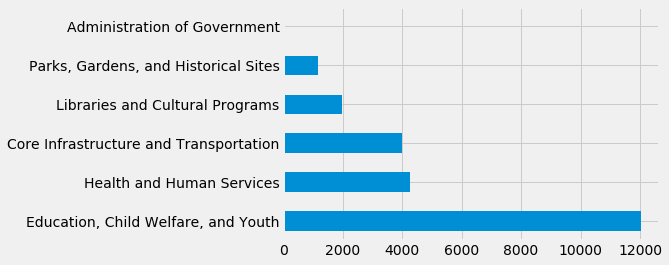

In [149]:
private_domain.plot.barh()

...and then concatenate the two graphs together to compare the number of public vs non-public facilities.

In [150]:
#create public and private columns and concatenate
frames = [public_domain, private_domain]
comb_domain = pd.concat(frames, axis=1)

#rename column names to public and private (otherwise they appear as facdomain)
col = ['public', 'non-public']

comb_domain.columns = col
#replace NaN with zeroes 
comb_domain = comb_domain.fillna(0)
comb_domain

,public,non-public
Administration of Government,3550,21.0
Core Infrastructure and Transportation,807,4002.0
"Education, Child Welfare, and Youth",2944,12032.0
Health and Human Services,495,4268.0
Libraries and Cultural Programs,41,1982.0
"Parks, Gardens, and Historical Sites",4162,1178.0
"Public Safety, Emergency Services, and Administration of Justice",630,0.0


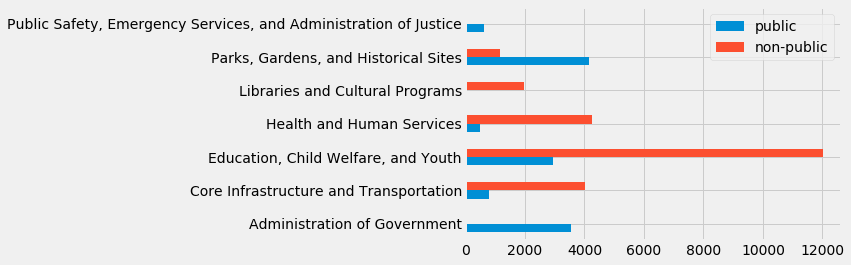

In [151]:
comb_domain.plot.barh()

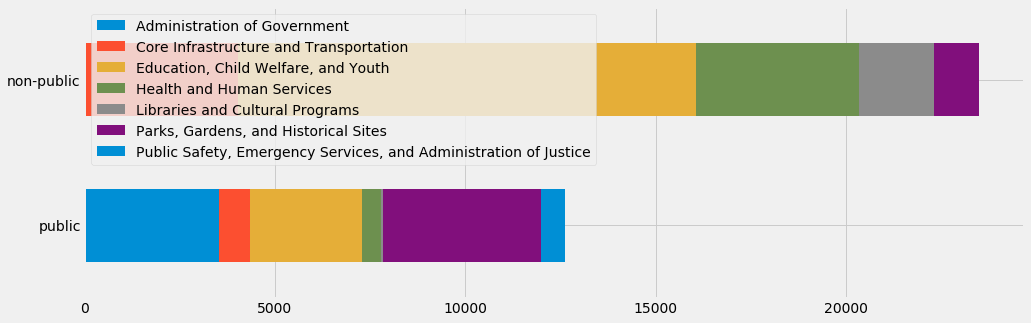

In [152]:
#A stacked bar graph - another perspective of seeing the facility data
comb_domain.T.plot.barh(stacked = True, figsize = (15, 5))

We can see that there is already a large difference between the types of facilities that are created. Non-public programs seem to have more of a focus on facilities that are geared towards improving individual life (health, education, transportation, libraries) while more facilities will utilize general administrative and governmental organizations (public safety, government administration, and parks).

This makes some sense because public facilities are more closely managed by the government regulations. It would be very odd to see that there are police stations being operated by non-public facilities. However, it was surprising to find how there are only 41 public libraries and cultural programs operated by public facilities.  

In [153]:
#Calculate proportion of public to non-public facilities and add to table
comb_domain['public_prop'] = (comb_domain['public']/ (sum(comb_domain['public']) + sum(comb_domain['non-public']))) * 100
comb_domain['non-public_prop'] = (comb_domain['non-public']/ (sum(comb_domain['public']) + sum(comb_domain['non-public']))) * 100 
comb_domain

,public,non-public,public_prop,non-public_prop
Administration of Government,3550,21.0,9.830527,0.058152
Core Infrastructure and Transportation,807,4002.0,2.234714,11.082189
"Education, Child Welfare, and Youth",2944,12032.0,8.152415,33.318564
Health and Human Services,495,4268.0,1.370735,11.818786
Libraries and Cultural Programs,41,1982.0,0.113536,5.488480
"Parks, Gardens, and Historical Sites",4162,1178.0,11.525255,3.262074
"Public Safety, Emergency Services, and Administration of Justice",630,0.0,1.744572,0.000000


### Confirming the Previous Analysis with Correlation 

In [154]:
#Use the pearson correlation method to determine pairwase correlation between public vs non-public facilities. 
comb_domain.corr(method = 'pearson')

,public,non-public,public_prop,non-public_prop
public,1.000000,0.081358,1.000000,0.081358
non-public,0.081358,1.000000,0.081358,1.000000
public_prop,1.000000,0.081358,1.000000,0.081358
non-public_prop,0.081358,1.000000,0.081358,1.000000


At a low of 0.08, there does not appear to be a very strong correlation or relationship between the public and non-public facilities

In [155]:
#Use the pearson correlation method to determine pairwase correlation between facility domains
comb_domain.T.corr(method = 'pearson')

,Administration of Government,Core Infrastructure and Transportation,"Education, Child Welfare, and Youth",Health and Human Services,Libraries and Cultural Programs,"Parks, Gardens, and Historical Sites","Public Safety, Emergency Services, and Administration of Justice"
Administration of Government,1.000000,-0.135468,-0.090728,-0.221824,-0.311957,0.960802,0.999984
Core Infrastructure and Transportation,-0.135468,1.000000,0.998986,0.996148,0.983598,0.144521,-0.140997
"Education, Child Welfare, and Youth",-0.090728,0.998986,1.000000,0.991191,0.974481,0.188920,-0.096286
Health and Human Services,-0.221824,0.996148,0.991191,1.000000,0.995626,0.057198,-0.227264
Libraries and Cultural Programs,-0.311957,0.983598,0.974481,0.995626,1.000000,-0.036330,-0.317256
"Parks, Gardens, and Historical Sites",0.960802,0.144521,0.188920,0.057198,-0.036330,1.000000,0.959240
"Public Safety, Emergency Services, and Administration of Justice",0.999984,-0.140997,-0.096286,-0.227264,-0.317256,0.959240,1.000000


As speculated before, there seems to be a connection between the following facilitiy domains because the correlation chart gives us clean -1 and 1 The two groups that the correlations give us are:

* Administration of Government
* Parks, Gardens, and Historical Sites
* Public Safety, Emergency Services, and Administration of Justice

and 

* Core Infrastructure and Transportation
* Education, Child Welfare, and Youth
* Health and Human Services
* Libraries and Cultural Programs

This affirms our suspicions before that while the public and non-public facilities are not necessarily related to each other, their aims have noticeably distinct priorities.

## Mapping the Data

In [ ]:
import folium
import numpy as np

### 3. How might location affect the appearance of public and private facilities?  Do locations with more public, more non-public, or a combination of both have a higher American Human Development Index (AHDI)?

 I will use the American Human Development Index dataset from 2009 to measure the success of public and private facilities in different areas. The American Human Development Index is a composite well-being measure made up of health, education, and income indicators; it is expressed on a ten-point scale, and 10 is the highest score possible. The dataset is from the data2go.ny project.

More information can be found at: www.measureofamerica.org.

In [192]:
#Clean up the AHDI table
ahdi = pd.read_csv('ahdi.csv')
ahdi_clean = ahdi.drop(["Unnamed: 2", "Unnamed: 3"], axis = 1).rename(index=str, columns={"Unnamed: 4" : "AHDI"})
ahdi_clean.head(5)

,GEO Label,GEO Display,AHDI
0,Bronx Community District 1 & 2,"Hunts Point, Longwood & Melrose",2.607330
1,Bronx Community District 8,"Riverdale, Fieldston & Kingsbridge",5.952927
2,Bronx Community District 12,"Wakefield, Williamsbridge & Woodlawn",5.194819
3,Bronx Community District 10,"Coop City, Pelham Bay & Schuylerville",6.108088
4,Bronx Community District 11,"Pelham Parkway, Morris Park & Laconia",4.763997


Meanwhile, I will be using the folium package to visualize a map of the facilities

Due to the lack of specific location data from the ahdi dataset and the enormous amount of data from the facilities dataset, I will be creating a function to make "sample maps" that can give us an idea of nearby facilities in a boro by picking a random sample of public and private facilities.

In [ ]:
def map_sample(boro):
    """
    Returns a partial map of facilities around a certain area given latitude and longitude. Uses boro
    tables of public and private facilities that we can sample from to create markers with. 
    """
    #pick a random location to generate map
    sample_spot = fac_clean.loc[fac_clean['boro'] == (boro)].sample(1)
    
    sample_map = folium.Map(location=[sample_spot["latitude"][0], sample_spot['longitude']][i],
                   zoom_start=12)    
      
    #create a table of public and private facilities that we can sample from 
    public_sample = public.loc[public['boro'] == (boro)].sample(10)
    private_sample = private.loc[private['boro'] == (boro)].sample(10)
    
    #add markers to map using longitude and latitudes
        
    for i in range(0, len(public_sample)):
        folium.Marker([public_sample[['latitude']][i], public_sample['longitude']][i],
              popup= public_sample[['facname']][0],
              icon=folium.Icon(icon='blue')
             ).add_to(sample_map)   

    for i in range(0, len(private_sample)):
        folium.Marker([private_sample[['latitude']][i], private_sample['longitude']][i],
              popup= private_sample[['facname']][0],
              icon=folium.Icon(icon='red')
             ).add_to(sample_map)
    
    return sample_map

This following is an example of the function with Manhattan borough

In [276]:
fac_clean.loc[fac_clean['boro'] == ("Manhattan")].sample(1) 

,facname,city,boro,latitude,longitude,xcoord,ycoord,censtract,facdomain,facgroup,facsubgrp,factype,capacity,util,optype,opname,overlevel,overagency,overabbrev,dataname
28543,Sp Plus Corporation,New York,Manhattan,40.761706,-73.969753,992629.169,216788.2494,11203,Core Infrastructure and Transportation,Transportation,Parking Lots and Garages,Commercial Garage,NYCDCA: 94,NaN,Non-public,Sp Plus Corporation,NYCDCA: City,NYC Department of Consumer Affairs,NYCDCA,NYCDCA: Legally Operating Businesses


In [277]:
sample_map = folium.Map(location=[40.761706, -73.969753],
                   zoom_start=12) 
sample_map

In [278]:
public_sample = public.loc[public['boro'] == ('Manhattan')].sample(5)
private_sample = private.loc[private['boro'] == ('Manhattan')].sample(5)

In [279]:
public_sample

,facname,city,boro,latitude,longitude,xcoord,ycoord,censtract,facdomain,facgroup,facsubgrp,factype,capacity,util,optype,opname,overlevel,overagency,overabbrev,dataname
28810,Liz Christy Garden,New York,Manhattan,40.724155,-73.991880,986500.7773,203105.8365,3602,"Parks, Gardens, and Historical Sites",Parks and Plazas,Gardens,Garden,NaN,NaN,Public,NYC Department of Parks and Recreation,NYCDPR: City,NYC Department of Parks and Recreation,NYCDPR,NYCDPR: Parks Properties
34192,Court of Appeals - Chambers,New York,Manhattan,40.752698,-73.975851,990940.8160,213505.6650,9200,"Public Safety, Emergency Services, and Adminis...",Justice and Corrections,Courthouses and Judicial,Courthouse,NaN,NaN,Public,NYS Unified Court System,NYCOURTS: City,NYS Unified Court System,NYCOURTS,NYCDCAS: City Owned and Leased Properties;NYCO...
9366,135 St Marine Transfer Station,New York,Manhattan,40.822636,-73.959388,995490.3405,238988.4326,22301,Core Infrastructure and Transportation,Solid Waste,Solid Waste Transfer and Carting,Solid Waste Transfer Station,NaN,NaN,Public,NYC Department of Sanitation,NYCDSNY: City,NYC Department of Sanitation,NYCDSNY,NYCDCAS: City Owned and Leased Properties
29240,Murray Bergtraum HS Field,New York,Manhattan,40.710501,-73.993734,985987.1646,198131.0657,800,"Parks, Gardens, and Historical Sites",Parks and Plazas,Recreation and Waterfront Sites,Playground/Sports Area,NaN,NaN,Public,NYC Department of Education,NYCDOE: City,NYC Department of Education,NYCDOE,NYCDCAS: City Owned and Leased Properties
14121,P.S. 163 - M,New York,Manhattan,40.794873,-73.968543,992959.9120,228872.2814,18500,"Education, Child Welfare, and Youth",Schools (K-12),Public K-12 Schools,Elementary School - Public,NaN,NYCDOE: 0,Public,NYC Department of Education,NYCDOE: City,NYC Department of Education,NYCDOE,NYCDCAS: City Owned and Leased Properties;NYCD...


In [280]:
private_sample

,facname,city,boro,latitude,longitude,xcoord,ycoord,censtract,facdomain,facgroup,facsubgrp,factype,capacity,util,optype,opname,overlevel,overagency,overabbrev,dataname
1533,Cpc Little Star Of Broome Street,New York,Manhattan,40.716094,-73.984473,988554.4066,200169.3486,1200,"Education, Child Welfare, and Youth",Child Care and Pre-Kindergarten,DOE Universal Pre-Kindergarten,Early Education Program,NYCDOE: 18,NaN,Non-public,Cpc Little Star Of Broome Street,NYCDOE: City,NYC Department of Education,NYCDOE,NYCDOE: Universal Pre-K (UPK) School Locations
20442,1114 Sixth Parking LLC,New York,Manhattan,40.754681,-73.982664,989052.8855,214227.7545,9600,Core Infrastructure and Transportation,Transportation,Parking Lots and Garages,Commercial Garage,NYCDCA: 188,NaN,Non-public,1114 Sixth Parking LLC,NYCDCA: City,NYC Department of Consumer Affairs,NYCDCA,NYCDCA: Legally Operating Businesses
15287,Insurance Company of North America Building,New York,Manhattan,40.708277,-74.006012,982583.0794,197320.9248,1502,"Parks, Gardens, and Historical Sites",Historical Sites,Historical Sites,State Historic Place,NaN,NaN,Non-public,Not Available,NYSOPRHP: State,"NYS Office of Parks, Recreation and Historic P...",NYSOPRHP,NYSOPRHP: National Register of Historic Places
34745,22-23 Operating LLC,New York,Manhattan,40.747756,-74.004846,982907.3200,211704.3555,9900,Core Infrastructure and Transportation,Transportation,Parking Lots and Garages,Commercial Parking Lot,NYCDCA: 81,NaN,Non-public,22-23 Operating LLC,NYCDCA: City,NYC Department of Consumer Affairs,NYCDCA,NYCDCA: Legally Operating Businesses;NYCDCAS: ...
25536,Amer Academy Of Dramatic Arts,New York,Manhattan,40.745571,-73.984902,988433.6212,210908.7680,7400,"Education, Child Welfare, and Youth",Higher Education,Colleges or Universities,2 Year Independent,NaN,NaN,Non-public,Amer Academy Of Dramatic Arts,NYSED: State,NYS Education Department,NYSED,NYSED: Listings - Active Institutions with GIS...


In [285]:
facility_map_example = folium.Map(location=[lat, long])

In [283]:
#Public markers
folium.Marker([40.724155, -73.991880],
    popup= "Liz Christy Garden",
    icon=folium.Icon(icon='blue')
    ).add_to(sample_map)
folium.Marker([40.752698, -73.975851],
    popup= "Liz Christy Garden",
    icon=folium.Icon(icon='blue')
    ).add_to(sample_map)
folium.Marker([40.822636, -73.959388],
    popup= "Liz Christy Garden",
    icon=folium.Icon(icon='blue')
    ).add_to(sample_map)
folium.Marker([40.710501, -73.993734],
    popup= "Liz Christy Garden",
    icon=folium.Icon(icon='blue')
    ).add_to(sample_map)
folium.Marker([40.794873, -73.968543],
    popup= "Liz Christy Garden",
    icon=folium.Icon(icon='blue')
    ).add_to(sample_map)

#Private Markers
folium.Marker([40.716094, -73.984473],
    popup= "Cpc Little Star Of Broome Street",
    icon=folium.Icon(icon='red')
    ).add_to(sample_map)
folium.Marker([40.754681, -73.982664],
    popup= "1114 Sixth Parking LLC",
    icon=folium.Icon(icon='red')
    ).add_to(sample_map)
folium.Marker([40.708277, -74.006012],
    popup= "Insurance Company of North America Building",
    icon=folium.Icon(icon='red')
    ).add_to(sample_map)
folium.Marker([40.747756, -74.004846],
    popup= "22-23 Operating LLC",
    icon=folium.Icon(icon='red')
    ).add_to(sample_map)
folium.Marker([40.745571, -73.984902],
    popup= "Amer Academy Of Dramatic Arts",
    icon=folium.Icon(icon='red')
    ).add_to(sample_map)   

In [284]:
sample_map